In [2]:
from oct2py import Oct2Py
from oct2py import octave
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import FinanceDataReader as fdr
import seaborn as sns
import time
from datetime import datetime, date
start_time = time.time()
from pandas import DataFrame
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from scipy.stats import norm
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
 
from scipy.stats import norm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AR
import requests
import json
import matplotlib.dates as mdates

In [3]:
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
csv_list = list(filter(lambda x : x.split('.')[-1] == 'csv', os.listdir()))
print(csv_list)
df = pd.DataFrame()

for file in csv_list:
    tmp_df = pd.read_csv(file, thousands = ',') # set the thousands option to delete ','
    t_df = tmp_df.transpose() # transpose the Data file
    header = t_df.iloc[0] 
    t_df = t_df[1:] # Delete the index 1
    t_df.rename(columns = header, inplace = True) 
    df = pd.concat([df,t_df]) # concat the data
    #print(df.shape)

df.reset_index(drop=False, inplace=True) # reset index
df = pd.DataFrame(df.iloc[:,[0,1]])
df

['01.csv', '02.csv', '03.csv', '04.csv', '05.csv', '06.csv', '07.csv', '08.csv', '09.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv', '17.csv', '18.csv', '19.csv', '20.csv', '21.csv']


,index,평균
0,2001-01-02,4840
1,2001-01-03,5040
2,2001-01-04,5240
3,2001-01-05,5240
4,2001-01-06,5040
...,...,...
5378,2021-12-27,11580
5379,2021-12-28,10432
5380,2021-12-29,14460
5381,2021-12-30,15380


In [5]:
start_date = pd.to_datetime('2001-01-01') 
end_date = pd.to_datetime('2021-12-31') 
dates = pd.DataFrame(pd.date_range(start_date,end_date,freq='D'))
dates.columns = ["index"]
dates["index"]=dates["index"].dt.strftime('%Y-%m-%d')
print(dates.dtypes)
dates

index    object
dtype: object


,index
0,2001-01-01
1,2001-01-02
2,2001-01-03
3,2001-01-04
4,2001-01-05
...,...
7665,2021-12-27
7666,2021-12-28
7667,2021-12-29
7668,2021-12-30


In [6]:
merge_data = pd.merge(dates, df, on = 'index', how = 'left')
merge_data = merge_data.sort_index()
merge_data["index"] = pd.to_datetime(merge_data["index"], errors='coerce')
merge_data.set_index("index", inplace=True)
merge_data = merge_data[1:]
merge_data = pd.DataFrame(merge_data)
merge_data

,평균
index,
2001-01-02,4840
2001-01-03,5040
2001-01-04,5240
2001-01-05,5240
2001-01-06,5040
...,...
2021-12-27,11580
2021-12-28,10432
2021-12-29,14460


In [7]:
merge_data = merge_data.replace({'-': '', ',': ''})
merge_data = merge_data.fillna(method='pad')
merge_data.isnull().sum()
merge_data2 = merge_data.apply(pd.to_numeric)
merge_data2.isnull().sum()
merge_data2.index.name = "Date"
sdf = merge_data2.reset_index()
sdf = sdf.iloc[:,[0,1]]
sdf.columns = ["date","mean"]

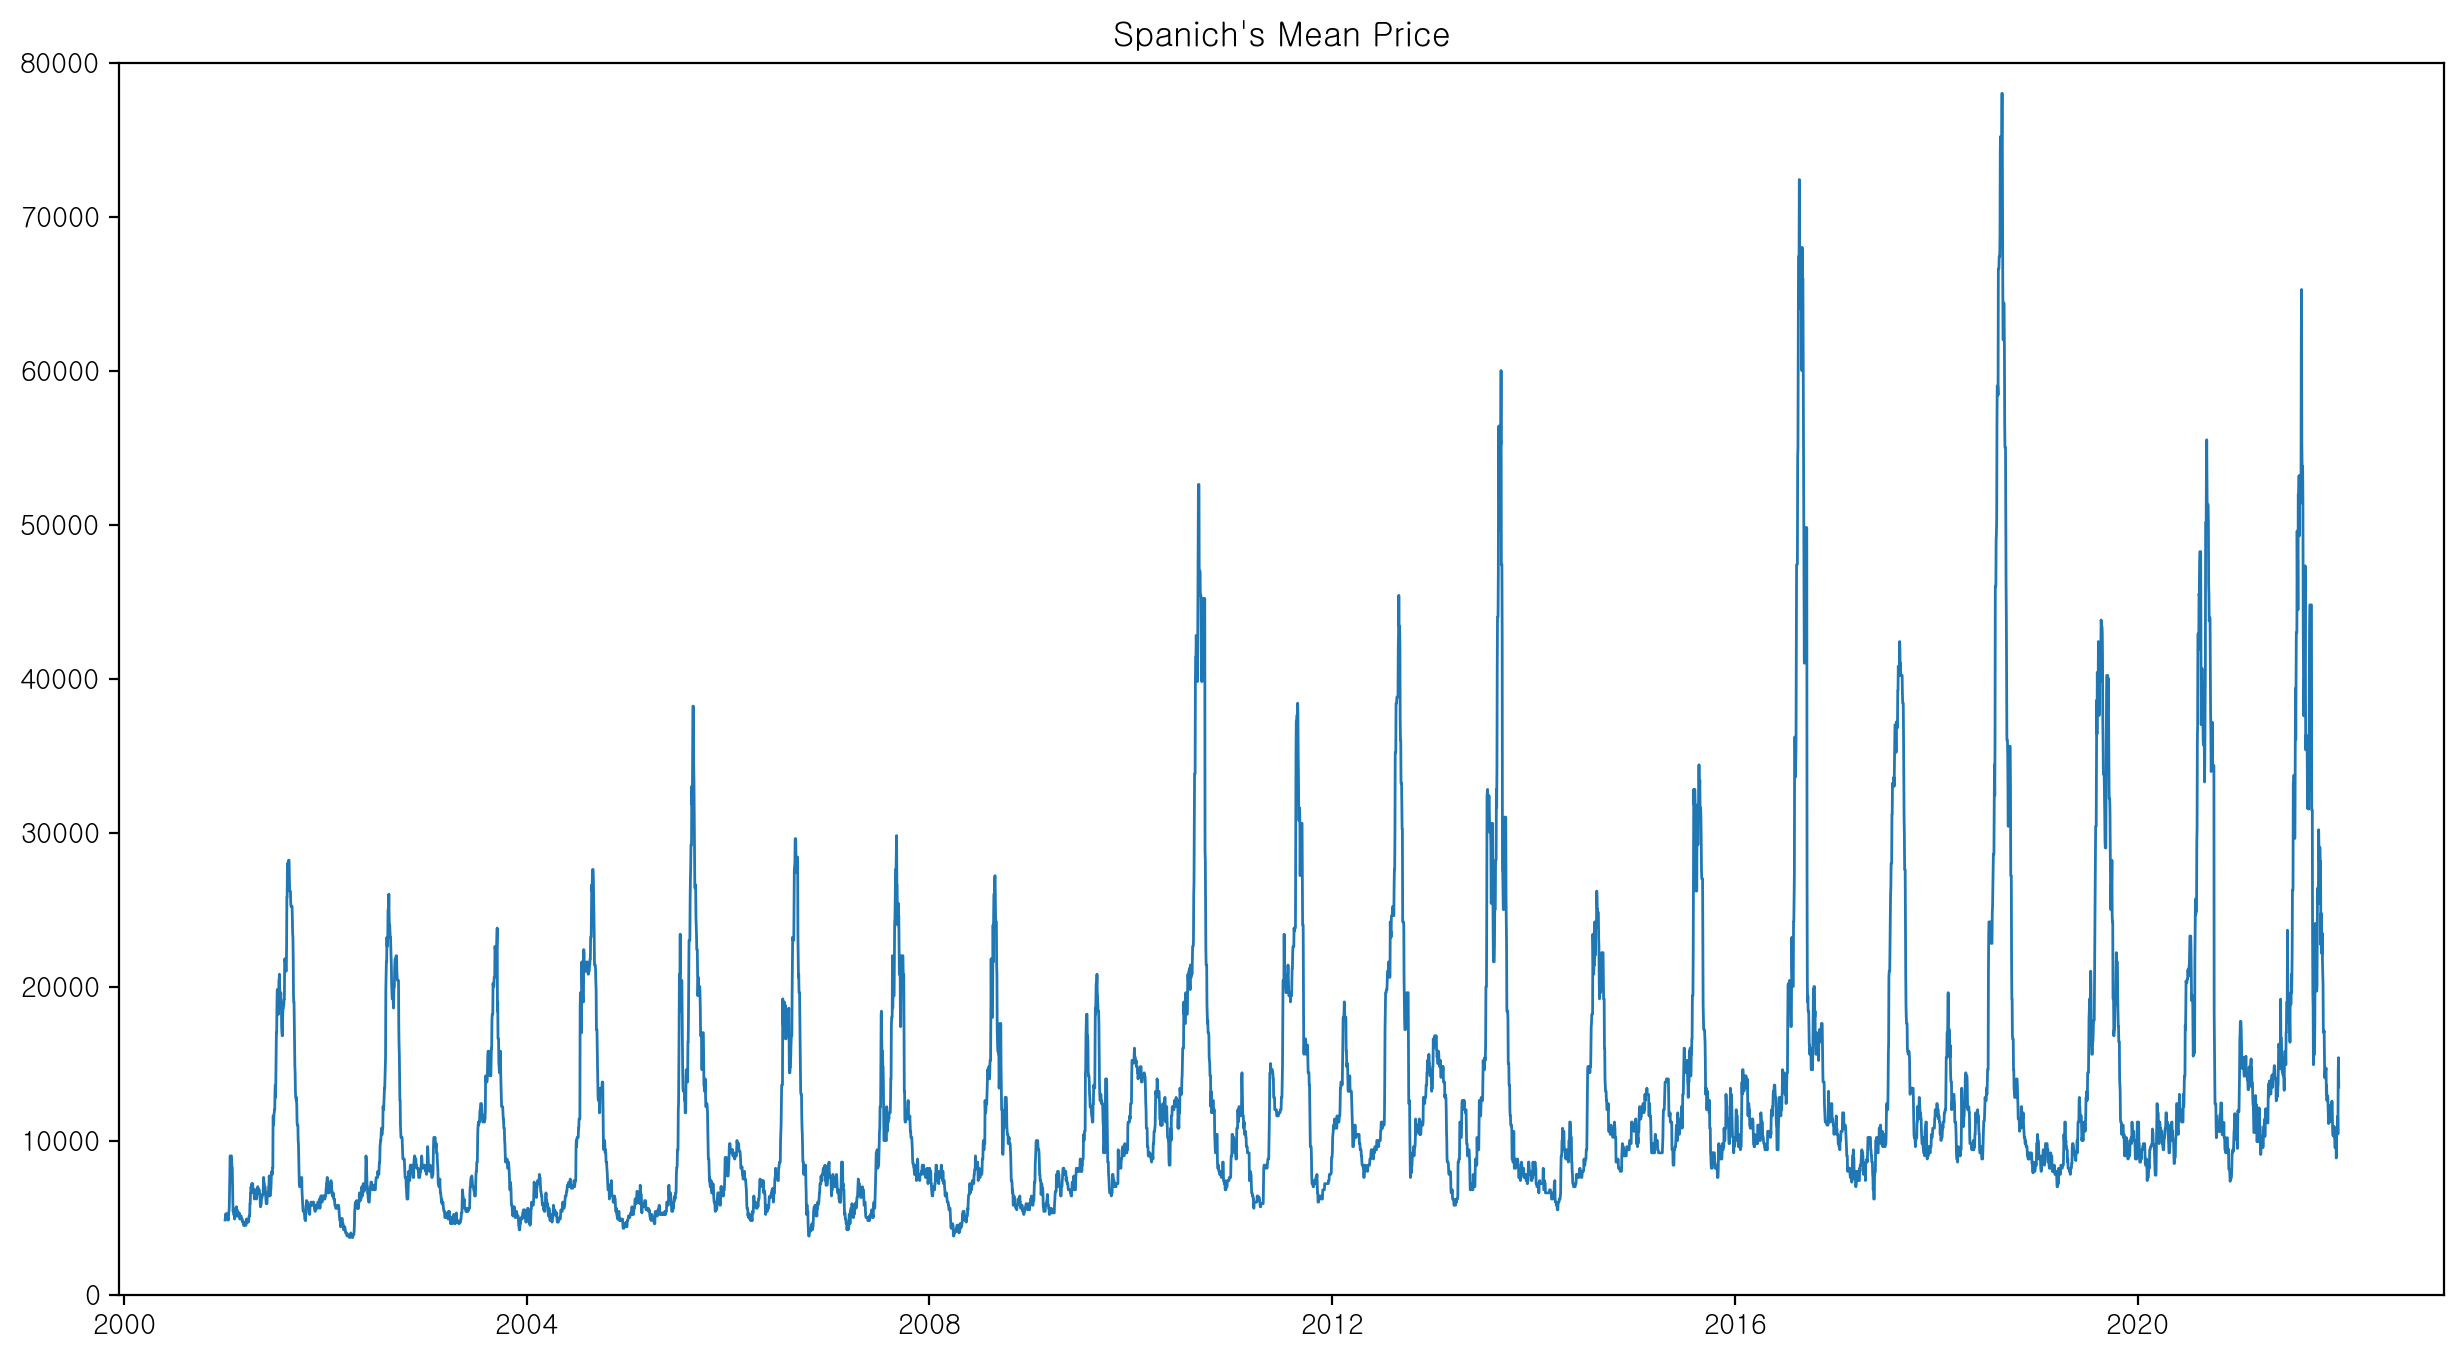

In [8]:
plt.figure(figsize=(15,8))
plt.ylim([0,80000])
plt.plot(sdf.iloc[:,0], sdf.iloc[:,1], linewidth = 1)
plt.title("Spanich's Mean Price")
plt.show()

In [9]:
import datetime

def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4) 
    return next_month - datetime.timedelta(days=next_month.day)

In [10]:
a = list()
for i in range(2001, 2022):
    for month in range(1, 13):
        a.append(last_day_of_month(datetime.date(i, month, 1)))

In [11]:
a = pd.DataFrame(a)
a.columns = ["date"]
a["date"]

0      2001-01-31
1      2001-02-28
2      2001-03-31
3      2001-04-30
4      2001-05-31
          ...    
247    2021-08-31
248    2021-09-30
249    2021-10-31
250    2021-11-30
251    2021-12-31
Name: date, Length: 252, dtype: object

In [12]:
a["date"]

0      2001-01-31
1      2001-02-28
2      2001-03-31
3      2001-04-30
4      2001-05-31
          ...    
247    2021-08-31
248    2021-09-30
249    2021-10-31
250    2021-11-30
251    2021-12-31
Name: date, Length: 252, dtype: object

In [13]:
sdf.date = sdf.date.astype(str)
a.date = a.date.astype(str)

In [14]:
ssdf = pd.merge(a, sdf, on = 'date', how = 'left')
ssdf

,date,mean
0,2001-01-31,5400
1,2001-02-28,5100
2,2001-03-31,5100
3,2001-04-30,7000
4,2001-05-31,5900
...,...,...
247,2021-08-31,47320
248,2021-09-30,14920
249,2021-10-31,22160
250,2021-11-30,12300


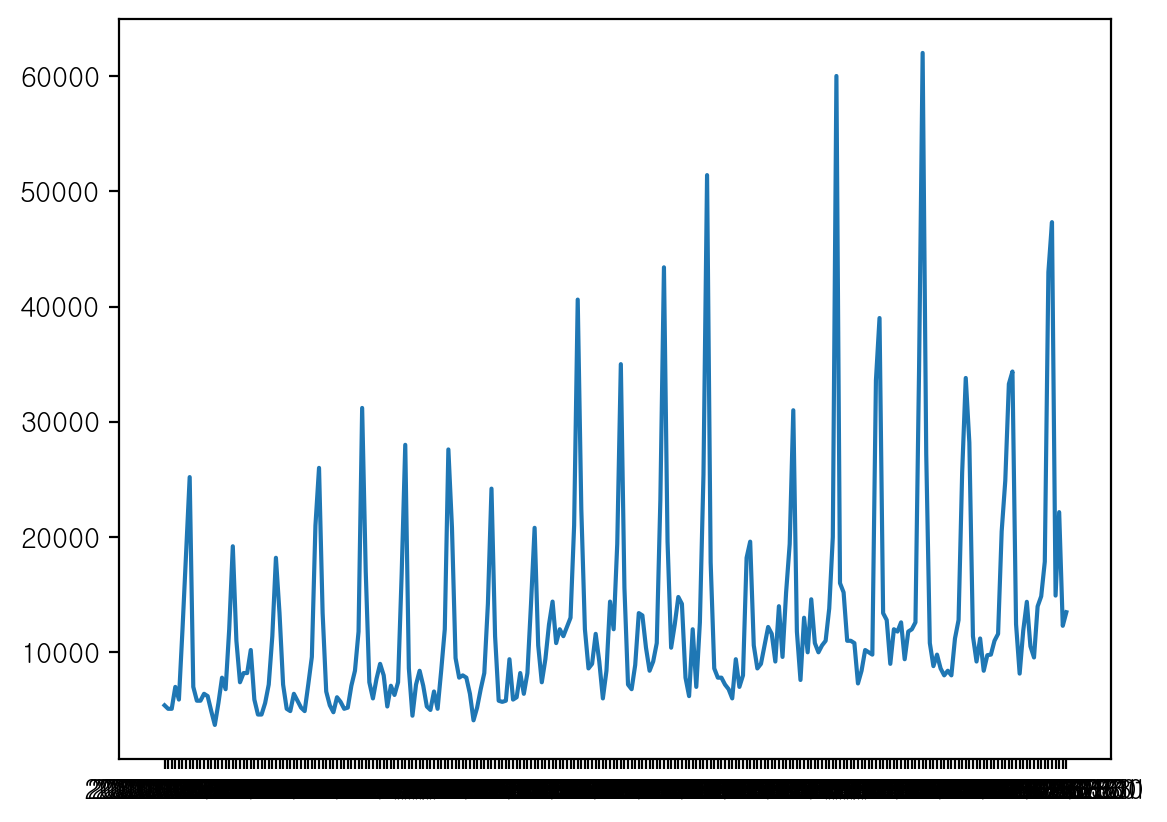

In [15]:
plt.plot(ssdf.iloc[:,0], ssdf.iloc[:,1])

In [16]:
sdfs = ssdf.iloc[:,[0,1]]
sdfs.iloc[:,1] = np.log(sdfs.iloc[:,1])
sdfs.iloc[:,1] = sdfs.iloc[:,1].diff(1)
sdfs = sdfs.iloc[1:,]

In [17]:
ssdf = sdfs
ssdf

,date,mean
1,2001-02-28,-0.057158
2,2001-03-31,0.000000
3,2001-04-30,0.316670
4,2001-05-31,-0.170958
5,2001-06-30,0.709954
...,...,...
247,2021-08-31,0.096198
248,2021-09-30,-1.154230
249,2021-10-31,0.395586
250,2021-11-30,-0.588690


In [18]:
ssdf.to_csv("ssss.csv")

In [19]:
oc = Oct2Py()
octave.addpath('C:/Users/KYM/Documents/MATLAB/AR process/AR1')

    _pyeval at line 57 column 30

    _pyeval at line 57 column 30

    _pyeval at line 57 column 30



'.;C:\\Users\\KYM\\anaconda3\\Lib\\site-packages\\oct2py;C:\\Users\\KYM\\anaconda3\\Lib\\site-packages\\octave_kernel;C:\\Octave\\mingw64\\lib\\octave\\7.3.0\\site\\oct\\x86_64-w64-mingw32;C:\\Octave\\mingw64\\lib\\octave\\site\\oct\\api-v57\\x86_64-w64-mingw32;C:\\Octave\\mingw64\\lib\\octave\\site\\oct\\x86_64-w64-mingw32;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\site\\m;C:\\Octave\\mingw64\\share\\octave\\site\\api-v57\\m;C:\\Octave\\mingw64\\share\\octave\\site\\m;C:\\Octave\\mingw64\\share\\octave\\site\\m\\startup;C:\\Octave\\mingw64\\lib\\octave\\7.3.0\\oct\\x86_64-w64-mingw32;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\m;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\m\\audio;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\m\\deprecated;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\m\\elfun;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\m\\general;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\m\\geometry;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\m\\gui;C:\\Octave\\mingw64\\share\\octave\\7.3.0\\

In [20]:
Y = np.transpose(np.matrix(ssdf.iloc[1:,1]))
YL = np.transpose(np.matrix(ssdf.iloc[0:250,1]))
T = len(Y)
X = np.concatenate((np.transpose(np.matrix(np.ones(T))), YL), axis=1)
k = 2
rhom = np.transpose(np.matrix(np.zeros(T)))
theta0 = np.matrix(0, 0.5, 0.1)
Data = np.concatenate((Y , X), axis = 1)
index = [1,2,3]
printi = 1


TypeError: Cannot interpret '0.5' as a data type

In [ ]:
theta0 = np.matrix(0, 0.5, 0.1)
Data = np.concatenate((Y , X), axis = 1)
index = [1,2,3]
printi = 1

In [ ]:
Y = np.transpose(np.matrix(ssdf.iloc[1:,1]))
YL = np.transpose(np.matrix(ssdf.iloc[0:250,1]))
T = len(Y)
X = np.concatenate((np.transpose(np.matrix(np.ones(T))), YL), axis=1)
k = 2
rhom = np.transpose(np.matrix(np.zeros(T)))
theta0 = np.matrix(0, 0.5, 0.1)
Data = np.concatenate((Y , X), axis = 1)
index = [1,2,3]
printi = 1

def lnlik(theta, Data):
    Y = Data[:,0]
    X = Data[:,1:]
    T = len(Y)

    beta = np.transpose(np.matrix(theta[0:2]))
    sig2 = theta[2]

    lnLm = np.transpose(np.matrix(np.zeros(T)))

    for t in range(0,T):

        yt = Y[t]
        xt = X[t,:]
        yf = xt*beta
        lnLm[t] = octave.lnpdfn(yt, yf, sig2)
    
    lnL = octave.sumc(lnLm)
    return lnL

lnlik(theta0, Data)

NameError: name 'np' is not defined

In [ ]:
def SA_Newton(FUN, constr, arg, Sn, printi, index, SF, a , IT, b, cs, IM, n, mr, eps, maxiter):
    co = 1
    if octave.nargin < 5:
        printi = 1
        narg = len(np.transpose(arg))
        index = np.matrix(range(0,narg))
        index = np.transpose(index)
        SF = 10*(np.ones(narg).reshape(3,1))
        a = 0.9
        IT = 1
        n = 15
        b = min(narg*10, 100)
        IM = 10
        cs = 5
        eps = 1e-6
        mr = 400
        maxiter = max(narg*10, 30)
    elif octave.nargin < 6:
        narg = len(np.transpose(arg))
        index = np.matrix(range(0,narg))
        index = np.transpose(index)
        SF = 10*(np.ones(narg).reshape(3,1))
        a = 0.9
        IT = 1
        n = 15
        b = min(narg*10, 100)
        IM = 10
        cs = 5
        eps = 1e-6
        mr = 400
        maxiter = max(narg*10, 30)
    elif octave.nargin < 7:
        narg = len(np.transpose(index))
        SF = 10*(np.ones(narg).reshape(3,1))
        a = 0.9
        IT = 1
        n = 15
        b = min(narg*10, 100)
        IM = 10
        cs = 5
        eps = 1e-6
        mr = 400
        maxiter = max(narg*10, 30)

In [ ]:
SF = 10*(np.ones(3).reshape(3,1))
SF.shape

(3, 1)

In [ ]:
arg = theta0
narg = len(arg)
printi = 1
narg = len(np.transpose(arg))
index = np.matrix(range(0,narg))
index = np.transpose(index)
SF = 10*np.ones(3).reshape(3,1)
a = 0.9
IT = 1
n = 15
b = min(narg*10, 100)
IM = 10
cs = 5
eps = 1e-6
mr = 400
maxiter = max(narg*30, 30)

In [ ]:
index = [1,2,3]
narg = len(np.transpose(index))
narg

3

In [ ]:
octave.nargin

"nargin" Octave function

In [ ]:
[thetamx, fmax, Vj, Vinv] = octave.SA_Newton(octave.lnlik, octave.paramconst, theta0, Data, printi, index)

-------------------------------------
initial function value  -228.6016
current temperature  1
current scale factor  10
M-H rate in stage  1    20
current function value  -228.6011
-------------------------------------
     indices  argmax
-------------------------------------
   1.0000e+00   2.0000e+00   3.0000e+00   4.3906e-03   5.0000e-01   1.0000e-01
-------------------------------------
Computing time of each SA iteration in min is =  0.00186
Total SA computing time in hours is =  0.00046499
Remaining SA computing time in min is =  0.02604
Remaining SA computing time in hours is =  0.00043399
Remaining SA computing time in days is =  1.8083e-05
current temperature  0.9
current scale factor  10
M-H rate in stage  2    30
current function value  -228.6011
-------------------------------------
     indices  argmax
-------------------------------------
   1.0000e+00   2.0000e+00   3.0000e+00   4.3906e-03   5.0000e-01   1.0000e-01
-------------------------------------
Computing time of

Oct2PyError: Octave evaluation error:
error: vertical dimensions mismatch (3x1 vs 1x3)
error: called from:
    Gradpnew1 at line 24, column 8
    DO_CKR2 at line 47, column 7
    SA_Newton at line 258, column 24

In [ ]:
import numpy as np
import math


class MLE():
    def __init__(self, samples, m, std, learning_rate, epochs, verbose=False):
        """
        :param samples: samples for get MLE
        :param learning_rate: alpha on weight update
        :param epochs: training epochs
        :param verbose: print status
        """
        self._samples = samples
        self._m = m
        self._std = std
        self._learning_rate = learning_rate
        self._epochs = epochs
        self._verbose = verbose


    def likelihood(self, x, M):
        """
        Probability Density Function is Normal distribution
        PDF's y is same as likelihood

        :param x:
        :return: likelihood of input x (likelihood of input x is same as y of pdf)
        """
        return (1 / math.sqrt(2*math.pi) * math.pow(self._std, 2)) * np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2))))


    def fit(self):
        """
        training estimator
        M, which minimizes Likelihood, is obtained by the gradient descent method.
        M is the MLE of the samples
        """

        # init M
        self._estimator = np.random.normal(self._m, self._std, 1)

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):
            likelihood = np.prod(self.likelihood(self._samples, self._m))
            prediction = np.prod(self.likelihood(self._samples, self._estimator))
            cost = self.cost(likelihood, prediction)
            self._training_process.append((epoch, cost))
            self.update(self._samples, self._estimator)

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self, likelihood, prediction):
        """
        cost function
        :param likelihood: likelihood of population
        :param prediction: likelihood in samples
        :return: the cost of optimizing the parameters
        """
        return math.sqrt(likelihood - prediction)


    def update(self, x, M):
        """
        update in gradient descent
        gradient is approximated
        :param x: samples
        :param M: estimator
        """
        gradient = np.sum(np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2)))))
        if self._m > self._estimator:
            self._estimator += self._learning_rate * gradient
        else:
            self._estimator -= self._learning_rate * gradient


    def get_mle(self):
        """
        parameter getter
        :return: estimator of MLE
        """
        return self._estimator


# run example
if __name__ == "__main__":

    # samples for MLE
    samples = np.array(ssdf["mean"])

    # assumptions about the population
    mean = 0.0036446539916889682
    std = 0.4466881649468214

    # get MLE
    estimator = MLE(samples, mean, std, learning_rate=0.01, epochs=30, verbose=True)
    estimator.fit()
    result = estimator.get_mle()
    print(result)

Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
[-1.25989207]


In [ ]:
np.array(ssdf["mean"]).std()

0.4466881649468214

In [ ]:
a = list()
for i in range(1, 10000):

    estimator = MLE(samples, mean, std, learning_rate=0.1, epochs=30, verbose=True)
    estimator.fit()
    result = estimator.get_mle()
    a = np.append(a, result)

Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
Iteration:

In [ ]:
a

array([ 13.23442281,  16.32192001,  -4.70506871, ...,  15.90162329,
         6.47793951, -14.76768915])

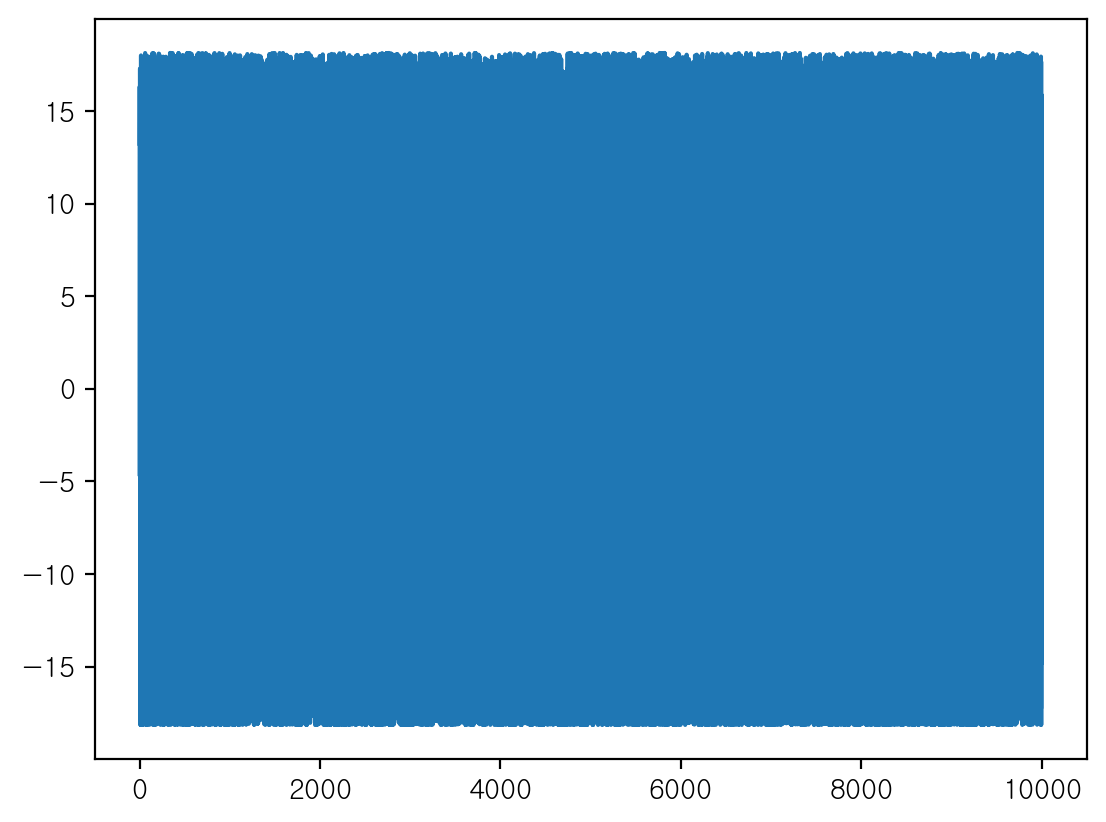

In [ ]:
plt.plot(a)

In [ ]:
len(np.arange(0.0001,0.1,0.01))

10

In [ ]:
np.arange(0.0001,0.1,0.001)

array([0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071,
       0.0081, 0.0091, 0.0101, 0.0111, 0.0121, 0.0131, 0.0141, 0.0151,
       0.0161, 0.0171, 0.0181, 0.0191, 0.0201, 0.0211, 0.0221, 0.0231,
       0.0241, 0.0251, 0.0261, 0.0271, 0.0281, 0.0291, 0.0301, 0.0311,
       0.0321, 0.0331, 0.0341, 0.0351, 0.0361, 0.0371, 0.0381, 0.0391,
       0.0401, 0.0411, 0.0421, 0.0431, 0.0441, 0.0451, 0.0461, 0.0471,
       0.0481, 0.0491, 0.0501, 0.0511, 0.0521, 0.0531, 0.0541, 0.0551,
       0.0561, 0.0571, 0.0581, 0.0591, 0.0601, 0.0611, 0.0621, 0.0631,
       0.0641, 0.0651, 0.0661, 0.0671, 0.0681, 0.0691, 0.0701, 0.0711,
       0.0721, 0.0731, 0.0741, 0.0751, 0.0761, 0.0771, 0.0781, 0.0791,
       0.0801, 0.0811, 0.0821, 0.0831, 0.0841, 0.0851, 0.0861, 0.0871,
       0.0881, 0.0891, 0.0901, 0.0911, 0.0921, 0.0931, 0.0941, 0.0951,
       0.0961, 0.0971, 0.0981, 0.0991])